# 1.この課題の目的
pyファイルを扱うことに慣れる
機械学習スクラッチの準備をする

## スクラッチの意義
ここでのスクラッチとは、NumPyなどの基本的なライブラリを組み合わせることで、scikit-learnのような応用的なライブラリと同じ機能のクラス・関数を自作することを指します。

## pyファイルの実行

In [1]:
%run hello.py

Hello, World!


## argparserを利用

In [2]:
%run hello_argparse.py

Hello, World!
RESULT : 102.4


In [3]:
%run hello_argparse.py --display --alpha 0.6 --text "Hello, argparse!" --num_iters 7

Hello, argparse!
1.2
2.4
4.8
9.6
19.2
38.4
76.8
RESULT : 76.8


## 【問題1】train_test_splitのスクラッチ



テストの重要性

scikit-learnのtrain_test_splitと同じ動作をしているか必ずテストをするようにしましょう。

ライブラリが存在するものをスクラッチする学習方法は動作の正しさを確認しやすいという利点があります。

In [6]:
import numpy as np
import pandas as pd
#from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
array_y = iris.target
df_train = df.copy()
df_train["TARGET"] = array_y
df_train = df_train[df_train["TARGET"] >= 1]

In [6]:
#def train_test_split(X, y, train_size=0.8, ):
    """
    学習用データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      学習データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    import numpy as np

    m = len(y)  # インデックス数
    train_num = int(m * train_size)  # トレインデータのスプリット後のインデックス数
    i = np.random.permutation(m)  # シャッフルするためのインデックス番号のarray
    X_train = X[i][:train_num]
    X_test = X[i][train_num:]
    y_train = y[i][:train_num]
    y_test = y[i][train_num:]

    return X_train, X_test, y_train, y_test


IndentationError: unexpected indent (<ipython-input-6-d90b8eb7bd97>, line 2)

In [6]:
import sys
sys.path.append("/Users/morio/diveintocode-ml/ml-scratch")

In [7]:
from utils.split import train_test_split1

In [8]:
df["index"] = np.arange(len(df))

In [9]:
X_train, X_test, y_train, y_test = train_test_split1(df.iloc[:10,:].values, np.arange(10))

In [10]:
X_train

array([[4.4, 2.9, 1.4, 0.2, 8. ],
       [5. , 3.6, 1.4, 0.2, 4. ],
       [5. , 3.4, 1.5, 0.2, 7. ],
       [5.4, 3.9, 1.7, 0.4, 5. ],
       [4.6, 3.1, 1.5, 0.2, 3. ],
       [5.1, 3.5, 1.4, 0.2, 0. ],
       [4.6, 3.4, 1.4, 0.3, 6. ],
       [4.7, 3.2, 1.3, 0.2, 2. ]])

In [11]:
y_train#これが前のデータフレームのインデックスです

array([8, 4, 7, 5, 3, 0, 6, 2])

In [12]:
df.iloc[:10,:]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),index
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,3
4,5.0,3.6,1.4,0.2,4
5,5.4,3.9,1.7,0.4,5
6,4.6,3.4,1.4,0.3,6
7,5.0,3.4,1.5,0.2,7
8,4.4,2.9,1.4,0.2,8
9,4.9,3.1,1.5,0.1,9


見た感じちゃんと分けれてそう

# 3.パイプラインの作成
次回以降、scikit-learnと同じ動作をするクラスを作成していきますが、まずはscikit-learnを使ったコードを用意しておきます。

ここまでの復習を兼ねていますので、学んだことを思い出しながら使いやすいコードを完成させてください。argparseを使って、外から引数を入れられるようにもしておきましょう。

このコードを元に、Sprintが進むごとに呼び出すクラスを自作のものに変えていきます。

# 【問題2】 分類パイプラインの作成
分類は3種類の手法を扱います。pyファイルで実行できる分類のパイプラインを作成してください。

ロジスティック回帰
SVM
決定木
データセットは3種類用意します。3つのデータセットが引数により切り替えられるようにしてください。

1つ目は事前学習期間同様にirisデータセットです。

sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation

2値分類としたいため、以下の2つの目的変数のみ利用します。特徴量は4種類全て使います。

virgicolorとvirginica
また、残り2つは可視化が可能な特徴量が2つのデータセットを人工的に用意します。以下のコードで説明変数X,目的変数yが作成可能です。「シンプルデータセット1」「シンプルデータセット2」とします。

シンプルデータセット1作成コード

In [13]:
params = {"C":2}

In [14]:
params = {"max_depth":10}

In [57]:
"""
作ったやつ

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statistics import mean
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt


# % matplotlib
# inline


class Pipyline():

    def __init__(self, df_train=None, X=None, y=None, TARGET="TARGET",
                 model_type="S", sprit_num=3, pos_label=1, std=True, params=None):

        self.model = 0  # 作成したmodelを格納
        self.auc_result = []
        self.auc_mean = 0
        self.auc = 0
        self.fpr = 0
        self.tpr = 0

        # データフレームをX,yに分割
        if isinstance(df_train, pd.core.frame.DataFrame):
            X = df_train.drop(TARGET, axis=1).values  # valursでarrayに変換
            y = df_train[TARGET].values

        auc_result = []
        # クロスバリデーションStratified K-Fold CV
        skf = StratifiedKFold(n_splits=sprit_num, random_state=39, shuffle=True)

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # 標準化するしない
            if std:
                sc = StandardScaler()
                sc.fit(X_train)
                X_train = sc.transform(X_train)
                X_test = sc.transform(X_test)

            # 学習
            if model_type == "L":  # ロジステくす回帰
                if params:  # パラメーター入力されているか判定
                    model = LogisticRegression(**params)
                else:
                    model = LogisticRegression()

            if model_type == "S":  # SVM
                if params:
                    model = SVC(probability=True, **params)
                else:
                    model = SVC(probability=True)

            if model_type == "D":  # 決定木
                if params:
                    model = DecisionTreeClassifier(**params)
                else:
                    model = DecisionTreeClassifier()

            model.fit(X_train, y_train)  # フィット
            # 予測
            y_pred_proba = model.predict_proba(X_test)
            y_pred = model.predict(X_test)

            # 評価
            # aucの計算　リストに格納
            auc = self.get_auc(y_test, y_pred_proba[:, 1], pos_label=pos_label)
            auc_result.append(auc)

        # 評価の表示
        auc_mean = mean(auc_result)
        print("aucの平均値：", auc_mean)
        # 他の評価指標も表示できるようにしたいところ
        print("ypred ",y_pred )

        self.auc = auc
        self.model = model
        self.auc_result = auc_result
        self.auc_mean = auc_mean

    def predict(self, X_test):
        return self.model.predict(X_test)

    def get_auc(self, y_test, y_pred, pos_label=1):
        """
        #aucの値を返します。pos_label:陽性のラベルの値
        """
        self.fpr, self.tpr, thresholds = roc_curve(y_test, y_pred, pos_label=pos_label)
        auc = metrics.auc(self.fpr, self.tpr)
        return auc

    def plot_roc_curve(self):

        """
        #OC曲線をプロットします。
        """

        # ROC曲線をプロット
        plt.figure(figsize=(6, 6))
        plt.plot(self.fpr, self.tpr, label='ROC curve (area = %.2f)' % self.auc)
        plt.legend()
        plt.title('ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.grid(True)
"""

IndentationError: unexpected indent (<ipython-input-57-5007e0fc6289>, line 102)

In [4]:
import numpy as np
import pandas as pd
#from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [13]:
import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0= [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

シンプルデータセット2作成コード

In [9]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
from utils.pipyline import Pipyline

/Users/morio/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [14]:
pipy1 = Pipyline(X=X,y=y, pos_label=1,model_type="L") #SIMPLEデータ２

/Users/morio/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/morio/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/morio/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



aucの平均値： 1.0
ypred  [-1  1  1  1 -1 -1  1 -1  1  1  1 -1  1 -1 -1 -1  1 -1  1  1  1  1 -1  1
  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1  1  1 -1  1  1
  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1
  1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1  1 -1  1  1  1 -1
  1  1  1  1 -1  1 -1 -1 -1 -1  1 -1  1  1 -1  1 -1  1 -1  1 -1  1  1  1
 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1
 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1  1]


In [54]:
pipy2 = Pipyline(df_train, pos_label=2, params=params) #アイリスデータセット

aucの平均値： 0.9940843065167243
ypred  [1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2]


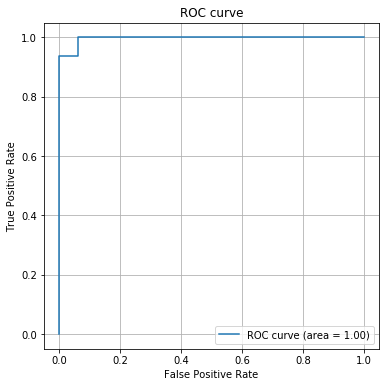

In [58]:
pipy2.plot_roc_curve()

## 【問題3】 回帰パイプラインの作成
回帰は1種類を扱います。pyファイルで実行できる回帰のパイプラインを作成してください。

線形回帰
データセットは事前学習期間同様にHouse Pricesコンペティションのものを使います。

House Prices: Advanced Regression Techniques

train.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使います。

In [94]:
#作ったやつ
"""
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# % matplotlib
# inline


class Pipyline_R():

    def __init__(self, df_train=None, X=None, y=None, TARGET="TARGET",
                 model_type="L", sprit_num=3, pos_label=1, std=True, params=None):

        self.model = 0  # 作成したmodelを格納
        self.rmse_result = []
        self.rmse_mean = 0

        # データフレームをX,yに分割
        if isinstance(df_train, pd.core.frame.DataFrame):
            X = df_train.drop(TARGET, axis=1).values  # valursでarrayに変換
            y = df_train[TARGET].values

        rmse_result = []
        # クロスバリデーションStratified K-Fold CV
        skf = StratifiedKFold(n_splits=sprit_num, random_state=39, shuffle=True)

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # 標準化するしない
            if std:
                sc = StandardScaler()
                sc.fit(X_train)
                X_train = sc.transform(X_train)
                X_test = sc.transform(X_test)

            # 学習
            if model_type == "L":  # ロジステくす回帰
                if params:  # パラメーター入力されているか判定
                    model = LinearRegression(**params)
                else:
                    model = LinearRegression()
                    
            if model_type == "S":  # SVM
                if params:
                    model = SVC(probability=True, **params)
                else:
                    model = SVC(probability=True)

            if model_type == "D":  # 決定木
                if params:
                    model = DecisionTreeClassifier(**params)
                else:
                    model = DecisionTreeClassifier()
                    
            model.fit(X_train, y_train)  # フィット
            # 予測
            y_pred = model.predict(X_test)

            # 評価
            # rmseの計算　リストに格納
            rmse = self.get_rmse(y_test, y_pred)
            rmse_result.append(rmse)

        # 評価の表示
        rmse_mean = mean(rmse_result)
        print("RMSEの平均値：", rmse_mean)
        #他の評価指標も表示できるようにしたいところ
        print("ypred ",y_pred )

        self.model = model
        self.rmse_result = rmse_result
        self.rmse_mean = rmse_mean

    def predict(self, X_test):
        return self.model.predict(X_test)

    def get_rmse(self, y_test, y_pred):
        """
        RMSEの値を返します。
        """
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse
"""

In [22]:
df_train2 = pd.read_csv("/Users/morio/diveintocode-ml/input/week4/train.csv")

In [23]:
columns = ["GrLivArea", "YearBuilt", "SalePrice"]

In [24]:
df_train2 = df_train2[columns]
df_train2.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [11]:
import sys
sys.path.append("/Users/morio/diveintocode-ml/ml-scratch")
from utils.pipyline_R import Pipyline_R
from utils.pipyline import Pipyline

In [26]:
r = Pipyline_R(df_train2, TARGET="SalePrice", )

/Users/morio/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning:

The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.

/Users/morio/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/Users/morio/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/Users/morio/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/Users/morio/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarn

RMSEの平均値： 47709.97678346751
ypred  [145382.89313436 190710.51968134 109791.46855514 150971.23959566
 140458.38335714 163574.49019214 156833.24853608 118629.45904801
 100640.54906412 150009.65268697 256130.15952784 123970.76409947
 233923.68529417 268410.34783096  42116.74713387  81785.07298363
 224957.74077971 179339.96397954 246547.22365043 271812.01246029
 200259.25568735 249249.54272375 243084.73808041 197696.29059275
 172420.08065644 320559.05807256 222545.52962095 212801.70651247
 215515.42554292 277988.21706076 139956.70056605 180786.7882439
 297036.28925855 147730.4621974  196027.75815662 191751.92745927
 160884.83773786 152870.34683687  99922.22474888 161428.34154109
 271378.72941199 233930.01860368 236639.95881774 232015.71141963
 153426.51725914 240315.26475688 244995.24527876 100205.99935392
 159809.23008853 146098.6841258  149263.44064052 293733.4242577
 243900.63770087 197269.34085396 113841.79109501 165753.593222
 257547.8293991  204619.97390156 145324.60551748 281270.794

In [28]:
r.rmse_result

[61701.70544766734, 35231.39286002046, 46196.83204271473]

In [29]:
r.model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
a = Pipyline(X=X,y=y)

aucの平均値： 0.35600907029478457
ypred  [0 0 0 0 1 0 0 1 0 1 1 1]
